In [19]:
import numpy as np 
import torch 
import matplotlib.pyplot as plt 
import os
import random
from glob import glob
import nibabel as nib 
from tqdm import tqdm
from PIL import Image
from scipy.interpolate import interp1d
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from image_folder import make_dataset

In [20]:
class VanillaUnalignedDataset(Dataset):
    def __init__(self):

        self.dir_A = "/home-local/Kernel_Conversion/AnatomyConstrainedMultipathGAN/AnatomyconstrainedMultipathGAN/training_data/train_siemens_masked_hard"
        self.dir_B = "/home-local/Kernel_Conversion/AnatomyConstrainedMultipathGAN/AnatomyconstrainedMultipathGAN/training_data/train_siemens_masked_soft" 
        self.mask_dirA = "/media/krishar1/Elements1/AnatomyConstrainedMultipathGAN/B30f_B50f/siemens_hard_mask_slices"
        self.mask_dirB = "/media/krishar1/Elements1/AnatomyConstrainedMultipathGAN/B30f_B50f/siemens_soft_mask_slices"
        print(self.dir_A)
        print(self.dir_B)
        print(self.mask_dirA)
        print(self.mask_dirB)
        self.A_paths = sorted(make_dataset(self.dir_A, float("inf")))   
        self.B_paths = sorted(make_dataset(self.dir_B, float("inf")))
        self.mask_A_paths = sorted(make_dataset(self.mask_dirA, float("inf")))
        self.mask_B_paths = sorted(make_dataset(self.mask_dirB, float("inf")))    
        self.A_size = len(self.A_paths)
        self.B_size = len(self.B_paths)    


    def __getitem__(self, index):
        A_path = self.A_paths[index % self.A_size]  # make sure index is within then range
        mask_A_path = self.mask_A_paths[index % self.A_size]
        index_B = random.randint(0, self.B_size - 1)
        B_path = self.B_paths[index_B]
        mask_B_path = self.mask_B_paths[index_B]
        
        A, mask_A = self.return_data(A_path, mask_A_path)
        B, mask_B = self.return_data(B_path, mask_B_path)
    
        #Return a tuple of the kernel data instead of an indivodual kernel. (Needs to be implemented)
        return {'A': A, 'B': B, 'A_mask': mask_A, 'B_mask': mask_B, 'A_paths': A_path, 'B_paths': B_path}

    def __len__(self):
        """Return the total number of images in the dataset.

        As we have different datasets with potentially different number of images,
        we take a maximum of all the datasets.
        """
        return max(self.A_size, self.B_size)
        # return max(self.subset_A, self.subset_B, self.subset_C, self.subset_D)


    def return_data(self, input_slice_path, mask_slice_path):
        nift_data = nib.load(input_slice_path).get_fdata()[:,:,0]
        tensor = torch.from_numpy(nift_data)
        torch_tensor = tensor.unsqueeze(0).float()
        mask_data = nib.load(mask_slice_path).get_fdata()[:,:,0]
        mask_tensor = torch.from_numpy(mask_data)
        mask_tensor = mask_tensor.unsqueeze(0).long()
        return torch_tensor, mask_tensor

dataloader = DataLoader(VanillaUnalignedDataset(), batch_size=1, shuffle=True, num_workers=2)

data = next(iter(dataloader))

A = data['A']
B = data['B']
A_mask = data['A_mask']
B_mask = data['B_mask']

print(A.shape)
print(B.shape)
print(A_mask.shape)
print(B_mask.shape)

/home-local/Kernel_Conversion/AnatomyConstrainedMultipathGAN/AnatomyconstrainedMultipathGAN/training_data/train_siemens_masked_hard
/home-local/Kernel_Conversion/AnatomyConstrainedMultipathGAN/AnatomyconstrainedMultipathGAN/training_data/train_siemens_masked_soft
/media/krishar1/Elements1/AnatomyConstrainedMultipathGAN/B30f_B50f/siemens_hard_mask_slices
/media/krishar1/Elements1/AnatomyConstrainedMultipathGAN/B30f_B50f/siemens_soft_mask_slices
torch.Size([1, 1, 512, 512])
torch.Size([1, 1, 512, 512])
torch.Size([1, 1, 512, 512])
torch.Size([1, 1, 512, 512])


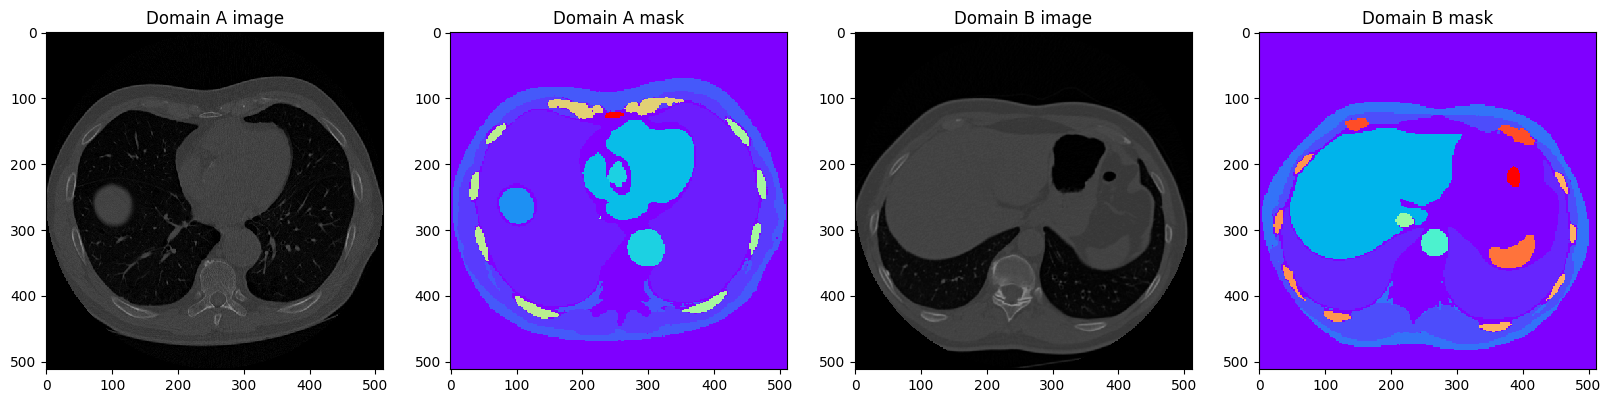

In [21]:
#Plot the data and masks
plt.figure(figsize=(20, 20))
plt.subplot(1, 4, 1)
plt.imshow(np.rot90(A[0][0]), cmap='gray', vmin = -1, vmax = 1)
plt.title('Domain A image')
plt.subplot(1, 4, 2)
plt.imshow(np.rot90(A_mask[0][0]), cmap='rainbow')
plt.title('Domain A mask')
plt.subplot(1, 4, 3)
plt.imshow(np.rot90(B[0][0]), cmap='gray', vmin = -1, vmax = 1)
plt.title('Domain B image')
plt.subplot(1, 4, 4)
plt.imshow(np.rot90(B_mask[0][0]), cmap='rainbow')
plt.title('Domain B mask')
plt.show()


In [22]:
np.unique(A_mask[0][0])

array([ 0,  1,  2,  3,  5,  7,  8, 12, 15, 16, 18, 26])

In [23]:
np.unique(B_mask[0][0])

array([ 0,  1,  2,  3,  5,  8, 11, 15, 16, 17, 18, 20])